# Price Elasticity of Demand, Statistical Modeling with Python
![](https://cdn-images-1.medium.com/max/2000/1*yhl_E_fI-4IifYhLV-3KDg.jpeg)

**Price elasticity of demand (PED)** is a measure used in economics to show the responsiveness, or `elasticity`, of the quantity demanded of a good or service to a change in its price when nothing but the price changes. More precisely, it gives the percentage change in quantity demanded in response to a one percent change in price.

In economics, elasticity is a measure of how sensitive demand or supply is to price.
In marketing, it is how sensitive consumers are to a change in price of a product.

It gives answers to questions such as:

- “If I lower the price of a product, how much more will sell?”
- “If I raise the price of one product, how will that affect sales of the other products?”
- “If the market price of a product goes down, how much will that affect the amount that firms will be willing to supply to the market?”

We will build a linear regression model to estimate PED, and we will use [Python’s Statsmodels](https://www.statsmodels.org/dev/about.html#module-statsmodels) to estimate our models as well as conduct statistical tests, and data exploration. Let’s get started!

## The data

We will work with the beef price and demand data that can be downloaded from [here](https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv).

In [1]:
%matplotlib inline
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2})
sns.set_palette("Set2")

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
beef = pd.read_csv(
    'https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv'
)
beef.head(5)

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


## Regression Analysis
### Ordinary Least Squares (OLS) Estimation

In [3]:
beef_model = ols("Quantity ~ Price", data=beef).fit()
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           1.69e-46
Time:                        03:38:32   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

### Observations:

1. The small P values indicate that we can reject the null hypothesis that Price has no effect on Quantity.
2. Hight R-squared indicates that our model explains a lot of the response variability.
3. In regression analysis, we’d like our regression model to have significant variables and to produce a high R-squared value.
4. We will show graphs to help interpret regression analysis results more intuitively.

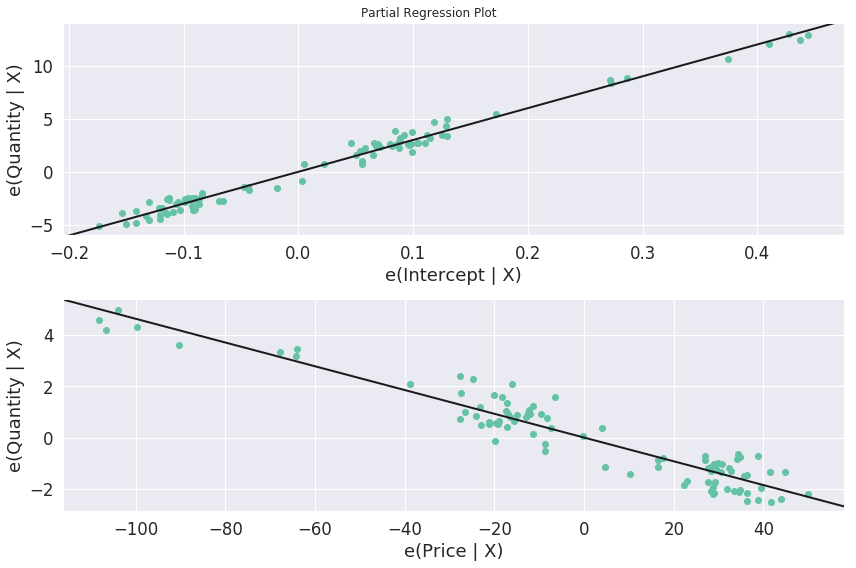

In [4]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(beef_model, fig=fig)
sns.despine()

The trend indicates that the predictor variables (Price) provides information about the response (Quantity), and data points do not fall further from the regression line, and the predictions are very precise given a prediction interval that extends from about 29 to 31.

### Component-Component plus Residual (CCPR) Plots
The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

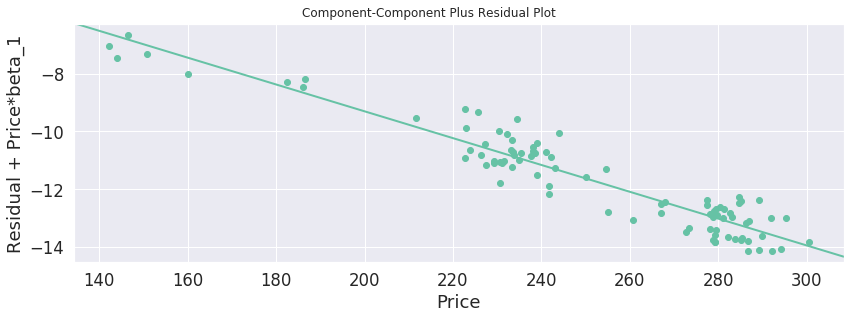

In [5]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(beef_model, fig=fig)

As you can see the relationship between the variation in Quantity explained by Price is definite linear. There are not many observations that are exerting considerable influence on the relationships.

### Regression plots
We use plot_regress_exog function to quickly check model assumptions with respect to a single regressor, Price in this case.

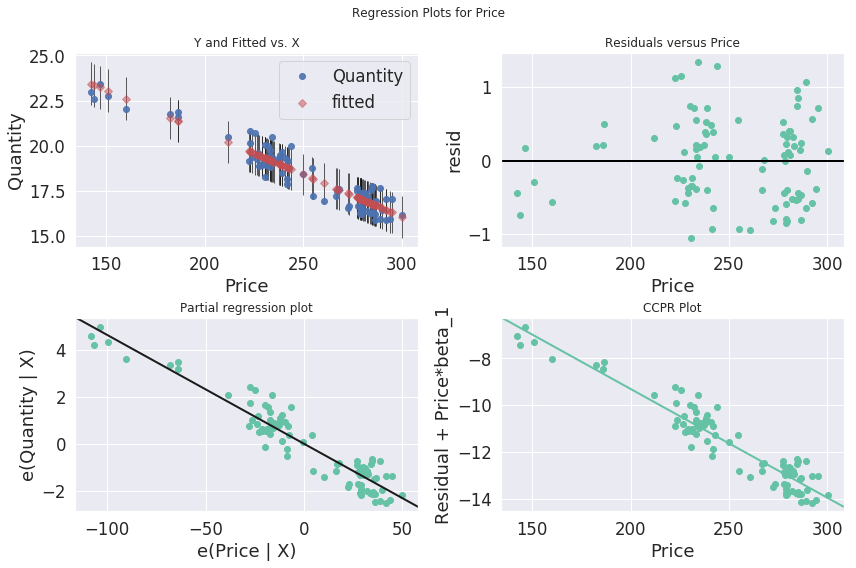

In [6]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(beef_model, 'Price', fig=fig)

### Recursive Least Square (RLS)

Finally we apply Recursive Least Square (RLS) filter to investigate parameter instability.

Before RLS estimation, we will manipulate the data and create a date time index.

In [7]:
beef['Year'] = pd.to_datetime(beef['Year'], format="%Y")
from pandas.tseries.offsets import *
beef['Date'] = beef.apply(lambda x:(x['Year'] + BQuarterBegin(x['Quarter'])), axis=1)
beef.drop(['Year', 'Quarter'], axis=1, inplace=True)
beef.set_index('Date', inplace=True)
beef.head(10)

,Quantity,Price
Date,,
1977-03-01,22.9976,142.1667
1977-06-01,22.6131,143.9333
1977-09-01,23.4054,146.5000
1977-12-01,22.7401,150.8000
1978-03-01,22.0441,160.0000
1978-06-01,21.7602,182.5333
1978-09-01,21.6064,186.2000
1978-12-01,21.8814,186.4333
1979-03-01,20.5086,211.7000


### RLS estimation

In [8]:
endog = beef['Quantity']
exog = sm.add_constant(beef['Price'])
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                   91
Model:                    RecursiveLS   Log Likelihood                 -84.326
Date:                Sun, 30 Dec 2018   AIC                            172.653
Time:                        03:38:34   BIC                            177.630
Sample:                    03-01-1977   HQIC                           174.659
                         - 09-01-1999                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0515      0.413     72.701      0.000      29.241      30.862
Price         -0.0465      0.002    -28.482      0.000      -0.050      -0.043
Ljung-Box (Q):                      422.30   Jarque-

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency BQS-DEC will be used.
  % freq, ValueWarning)


The RLS model computes the regression parameters recursively, so there are as many estimates as there are data points, the summary table only presents the regression parameters estimated on the entire sample; these estimates are equivalent to OLS estimates.

### RLS plots
We can generate the recursively estimated coefficients plot on a given variable.

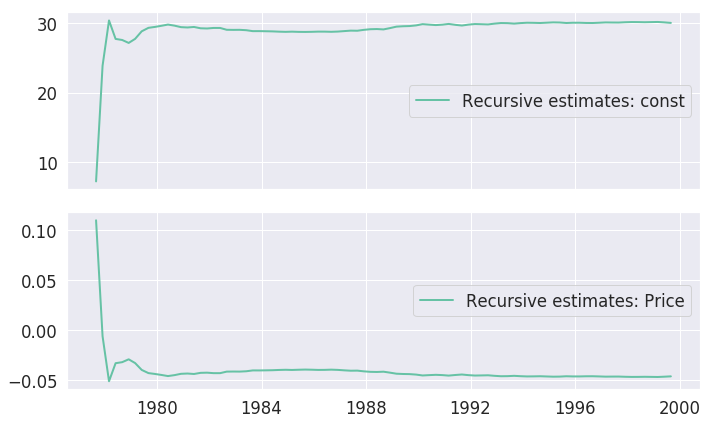

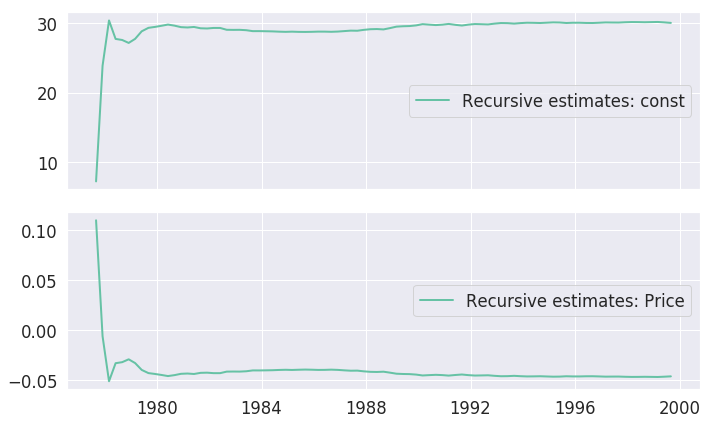

In [9]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6), legend_loc='center right')

For convenience, we visually check for parameter stability using the plot_cusum function.

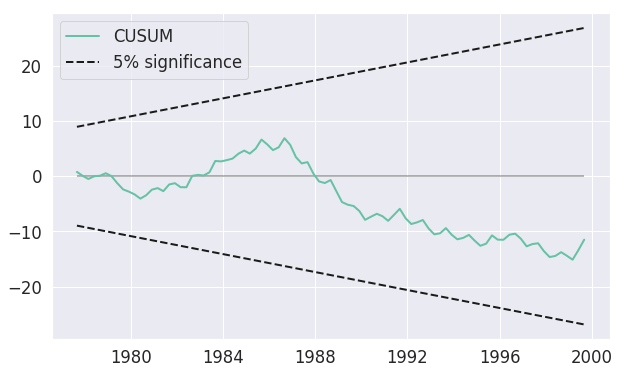

In [10]:
fig = res.plot_cusum(figsize=(10,6))

n the plot above, the CUSUM statistic does not move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level.

## Additional

In [11]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Price_elasticity_of_demand', width=800, height=450)

In [12]:
IFrame('https://en.wikipedia.org/wiki/Elasticity_%28economics%29', width=800, height=450)